### Hypothesis 4: Job applicants with Python skills have a higher likelihood of being recruited for full-time positions.

In [34]:
# Import Required Libraries
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


In [4]:
# database connection details
db_type = 'postgresql'  
username = 'postgres'
password = 'abc123'
host = 'localhost'
port = '5432'  
database = 'DataEngineering'

# Create the connection string
connection_string = f'{db_type}://{username}:{password}@{host}:{port}/{database}'
engine = create_engine(connection_string)


In [12]:
# Define the SQL query
from sqlalchemy import create_engine, text
query = """
SELECT 
    jp."Job_Posting_id",
    i."Involvement",
    s."Skill"
FROM 
    public."Job_Postings" jp
JOIN 
    public."Involvements" i ON jp."Involvement_id" = i."Involvement_id"
JOIN 
    public."Job_Postings_Skills" jps ON jp."Job_Posting_id" = jps."Job_Posting_id"
JOIN 
    public."Skills" s ON jps."Skill_id" = s."Skill_id";
"""
try:
    with engine.connect() as connection:
        result = connection.execute(text(query))
        data = result.fetchall()
        columns = result.keys()

    # Load the data into a Pandas DataFrame
    df = pd.DataFrame(data, columns=columns)
    print(df)

except Exception as e:
    print(f"Error executing query: {e}")

      Job_Posting_id Involvement   Skill
0                 19  Full-time   python
1                 90  Full-time   python
2                102  Full-time   python
3                174  Full-time   python
4                190  Full-time   python
...              ...         ...     ...
2911             767  Full-time       ml
2912             768  Full-time       ml
2913             777  Full-time       ml
2914             780  Full-time       ml
2915             787  Full-time       ml

[2916 rows x 3 columns]


In [13]:
print(df.head())
print(df.info())
print(df.describe(include='all'))

   Job_Posting_id Involvement   Skill
0              19  Full-time   python
1              90  Full-time   python
2             102  Full-time   python
3             174  Full-time   python
4             190  Full-time   python
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916 entries, 0 to 2915
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Job_Posting_id  2916 non-null   int64 
 1   Involvement     2916 non-null   object
 2   Skill           2916 non-null   object
dtypes: int64(1), object(2)
memory usage: 68.5+ KB
None
        Job_Posting_id Involvement Skill
count      2916.000000        2916  2916
unique             NaN           2    31
top                NaN  Full-time     ai
freq               NaN        2851   704
mean        443.289438         NaN   NaN
std         250.859188         NaN   NaN
min           1.000000         NaN   NaN
25%         212.750000         NaN   NaN
50%         466.00000

In [19]:
# Create target variable: 1 if Full-time, 0 otherwise
df['Fulltime'] = df['Involvement'].str.strip().apply(lambda x: 1 if x == 'Full-time' else 0)

# Create feature: 1 if Skill is Python, 0 otherwise
df['Python_Skill'] = df['Skill'].apply(lambda x: 1 if x.lower() == 'python' else 0)

# Features and target
X = df[['Python_Skill']]
y = df['Fulltime']

df

,Job_Posting_id,Involvement,Skill,Fulltime,Python_Skill
0,19,Full-time,python,1,1
1,90,Full-time,python,1,1
2,102,Full-time,python,1,1
3,174,Full-time,python,1,1
4,190,Full-time,python,1,1
...,...,...,...,...,...
2911,767,Full-time,ml,1,0
2912,768,Full-time,ml,1,0
2913,777,Full-time,ml,1,0
2914,780,Full-time,ml,1,0


### Data Visualization

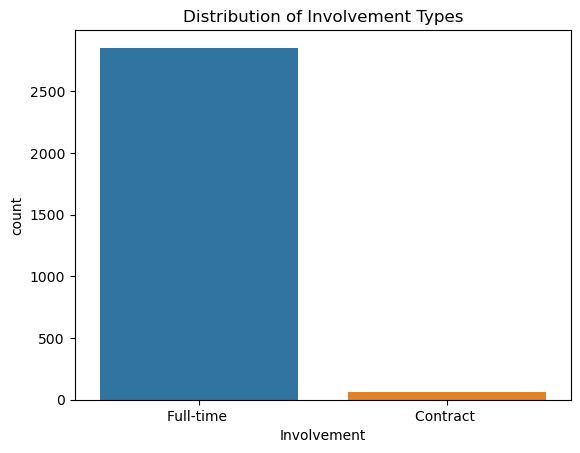

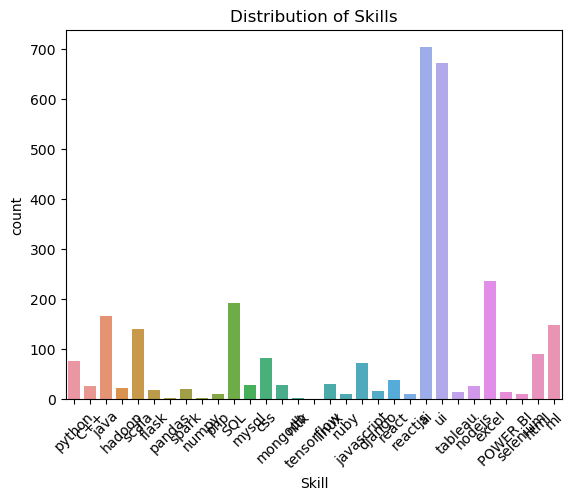

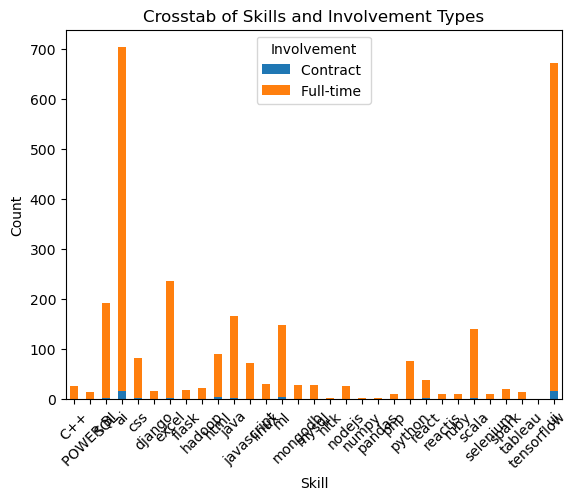

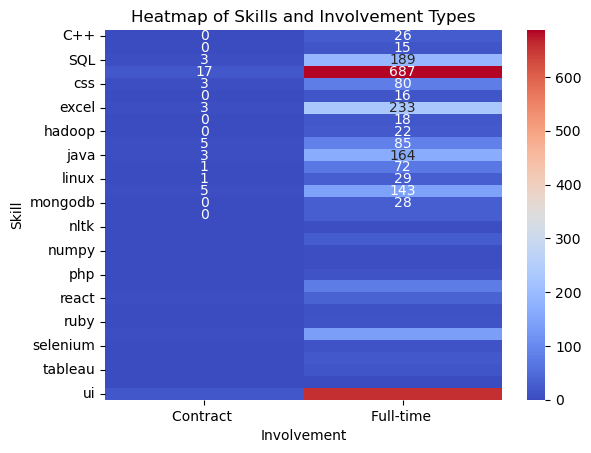

In [24]:
# Distribution : Full-time vs. Contract positions
sns.countplot(x='Involvement', data=df)
plt.title('Distribution of Involvement Types')
plt.show()

# Distribution of Skills
sns.countplot(x='Skill', data=df)
plt.title('Distribution of Skills')
plt.xticks(rotation=45)
plt.show()

# Crosstab of Skills and Involvement Types
crosstab = pd.crosstab(df['Skill'], df['Involvement'])
crosstab.plot(kind='bar', stacked=True)
plt.title('Crosstab of Skills and Involvement Types')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Heatmap of the crosstab
sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Skills and Involvement Types')
plt.show()

### Apply Machine Learning Models

In [25]:
# Features and target
X = df[['Python_Skill']]
y = df['Fulltime']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### k-Nearest Neighbors (k-NN)


In [32]:
knn = KNeighborsClassifier(n_neighbors=3)  # You can tune the n_neighbors parameter
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\nK-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


K-Nearest Neighbors:
Accuracy: 0.9828571428571429
Confusion Matrix:
 [[  0  15]
 [  0 860]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.98      1.00      0.99       860

    accuracy                           0.98       875
   macro avg       0.49      0.50      0.50       875
weighted avg       0.97      0.98      0.97       875



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

In [35]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.9828571428571429
Confusion Matrix:
 [[  0  15]
 [  0 860]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.98      1.00      0.99       860

    accuracy                           0.98       875
   macro avg       0.49      0.50      0.50       875
weighted avg       0.97      0.98      0.97       875



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### XGBoost

In [37]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\nXGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost:
Accuracy: 0.9828571428571429
Confusion Matrix:
 [[  0  15]
 [  0 860]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.98      1.00      0.99       860

    accuracy                           0.98       875
   macro avg       0.49      0.50      0.50       875
weighted avg       0.97      0.98      0.97       875



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Interpretation
#### In all three models accuracy score is 98% since it indicates that model coreectly predicts wheather a job applicant with Python skills is likely to be recruited for full time position.


### According to above results, Hypothesis 4 is correct!